
*Note:* You can run this from your computer (Jupyter or terminal), or use one of the
hosted options:

[![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fspec-api-sql%252FREADME.ipynb%26branch%3Dmaster)

[![deepnote-logo](https://deepnote.com/buttons/launch-in-deepnote-small.svg)](https://deepnote.com/launch?template=deepnote&url=https://github.com/ploomber/projects/blob/master/spec-api-sql/README.ipynb)


# SQL/Python pipeline

Pipeline with SQL and Python tasks.

## Setup

(**Note**: Skip if running in binder or deepnote)

~~~sh
# if using conda
conda env create --file environment.yaml
conda activate spec-api-sql

# or use pip directly
# note that this won't install pygraphviz. If you want to plot the pipeline
# you have to install it first
pip install -r requirements.txt
~~~

## Create sample data


In [1]:
%%sh
# create sample data
cd setup
bash setup.sh
# move back to the original spec-api-sql folder
cd ..

  Using cached Faker-6.6.0-py3-none-any.whl (1.2 MB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


## Definition

In [2]:
%%sh
cat pipeline.yaml

meta:
  product_default_class:
    SQLScript: SQLiteRelation

  jupyter_hot_reload: True

config:
  hot_reload: True

clients:
  # tasks
  SQLScript: config.get_client
  SQLDump: config.get_client
  # products
  SQLiteRelation: config.get_client

tasks:
  - source: filter_sales.sql
    product: [filtered_sales, table]
    name: filter_sales

  - source: group_sales.sql
    product: [grouped_sales, table]
    name: group_sales

  - source: filter_prices.sql
    product: [filtered_prices, table]
    name: filter_prices

  - source: join.sql
    product: [joined, table]
    name: join

  - class: SQLDump
    source: join_dump.sql
    product: output/joined_data.csv
    name: join_dump
    chunksize: null

  - source: plot.py
    product: output/plot.html

The first two sections configure our pipeline; the `tasks` section is the
actual pipeline definition. We see that we have a few SQL transformations,
then we dump a table to a CSV file and we produce an HTML report at the end.
The order here doesn't matter, the source code itself declares its own
upstream dependencies, and Ploomber extracts them to execute your pipeline.

## Plot

In [3]:
%%sh
# Note: plotting doesn't work in deepnote
# Note: if plotting locally, install pygrapviz first
ploomber plot

Plot saved at: pipeline.png


100%|██████████| 6/6 [00:00<00:00, 8510.59it/s]


If running in Jupyter, load the plot with this code:

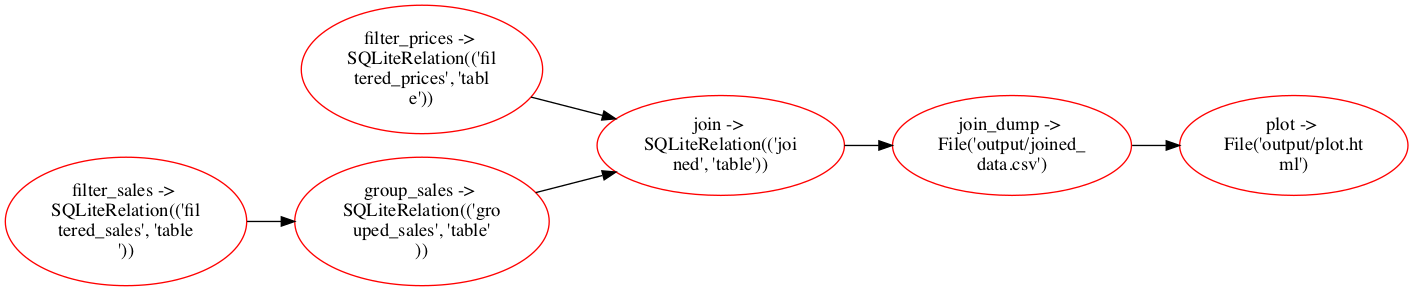

In [4]:

from IPython.display import Image
Image(filename='pipeline.png')

Otherwise, open the `pipeline.png` file directly.

## Build

In [5]:
%%sh
ploomber build

name           Ran?      Elapsed (s)    Percentage
-------------  ------  -------------  ------------
filter_prices  True         0.00418      0.141396
filter_sales   True         0.001748     0.0591291
group_sales    True         0.001476     0.0499282
join           True         0.001153     0.0390022
join_dump      True         0.002809     0.0950192
plot           True         2.94488     99.6155


Building task "plot": 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]


The final output is a report: [output/plot.html](output/plot.html).